# **Data Visualization**
*This notebook contains the data visualization of the data provided by the [IBM Call for Code Wildfire Challenge](https://community.ibm.com/community/user/datascience/blogs/susan-malaika/2020/11/10/call-for-code-spot-challenge-for-wildfires). The content is available [on GitHub](https://github.com/knattarina/wildfire_challenge).*


*   loading csv data (wildfires, weather, forecasts, landclass and vegetation index)
*   collecting averages per month // per region & month
*   



In [ ]:
import sys
!{sys.executable} -m pip install seaborn==0.11.0

import types
import pandas as pd
import numpy as np
import datetime
import os
import folium
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt 
%matplotlib inline

from shapely.geometry import mapping
from shapely.geometry import Polygon
from folium.plugins import TimeSliderChoropleth
from google.colab import drive

drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Wildfire_Challenge/Data')

sns.set_style("whitegrid")

landclass_df = pd.read_csv('LandClass.csv')
aggr_df = pd.read_csv('Cleansed_Data.csv')
vegetation_df = pd.read_csv('VegetationIndex.csv')

aggr_df['Date'] = pd.to_datetime(aggr_df['Date'])

     |████████████████████████████████| 286kB 6.4MB/s 
  Found existing installation: seaborn 0.11.1
    Uninstalling seaborn-0.11.1:
      Successfully uninstalled seaborn-0.11.1
Mounted at /content/drive




*   collecting averages per month



In [ ]:
# setting month filter
filter = aggr_df["Month"]==5
  
# filtering data
month = aggr_df.where(filter, inplace = False)
month = month.replace(0, np.NaN)

month.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



Estimated_fire_area                                                        83.482094
Mean_estimated_fire_brightness                                            314.627539
Mean_estimated_fire_radiative_power                                        71.075556
Precipitation_Max                                                           9.239468
Precipitation_Mean                                                          0.869487
Precipitation_Min                                                           0.001469
Precipitation_Variance                                                      3.916525
RelativeHumidity_Max                                                       88.239669
RelativeHumidity_Mean                                                      60.973386
RelativeHumidity_Min                                                       39.960203
RelativeHumidity_Variance                                                 140.162174
SoilWaterContent_Max                                             

In [ ]:
#collecting filter per region and month
region = aggr_df[aggr_df['Region'] == "VI"]
filter = region["Month"]==12

# filtering data
region_and_month = region.where(filter, inplace = False)
region_and_month = region_and_month.replace(0, np.NaN)
region_and_month.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



Estimated_fire_area                                                        80.164593
Mean_estimated_fire_brightness                                            319.429847
Mean_estimated_fire_radiative_power                                       105.028126
Precipitation_Max                                                           5.723898
Precipitation_Mean                                                          0.950974
Precipitation_Min                                                           0.001655
Precipitation_Variance                                                      3.420933
RelativeHumidity_Max                                                       82.100361
RelativeHumidity_Mean                                                      54.407619
RelativeHumidity_Min                                                       30.669698
RelativeHumidity_Variance                                                 187.792634
SoilWaterContent_Max                                             

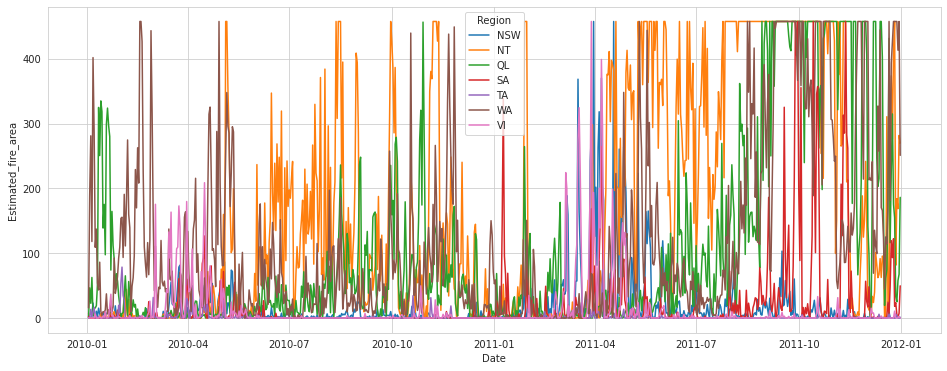

In [ ]:
mask = (aggr_df['Date'] > '2010-1-1') & (aggr_df['Date'] <= '2011-12-31')

df = aggr_df.loc[mask]

plt.figure(figsize=(16, 6))
g = sns.lineplot(x="Date", y="Estimated_fire_area", hue='Region', data=df)

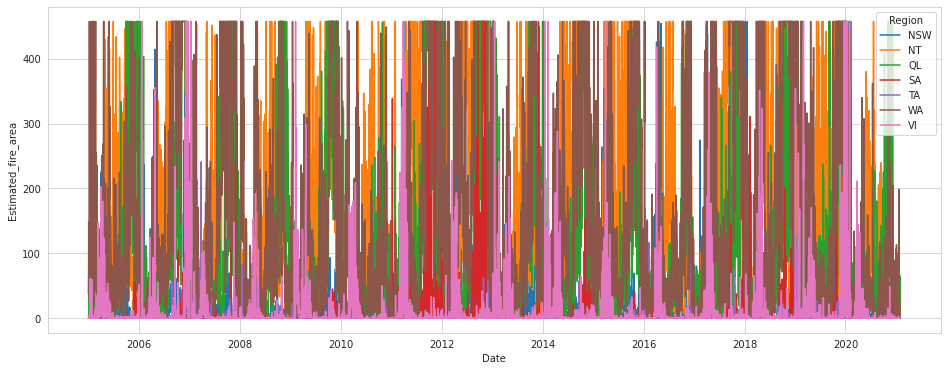

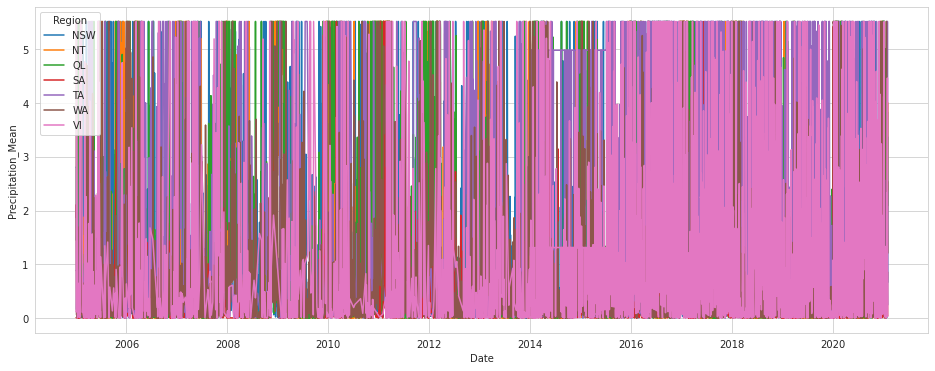

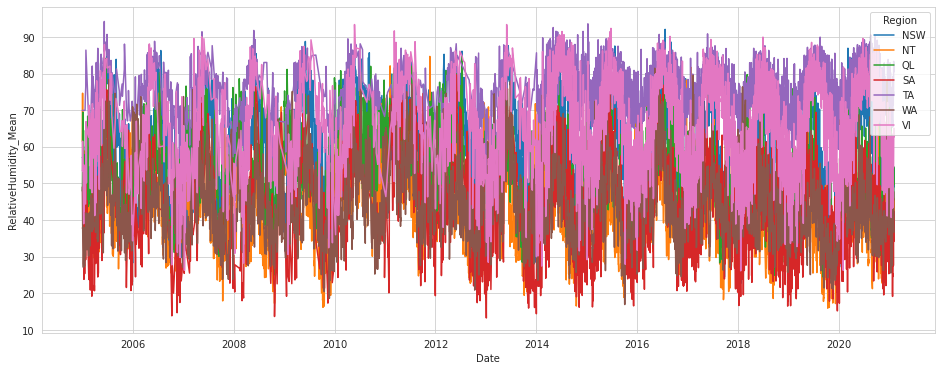

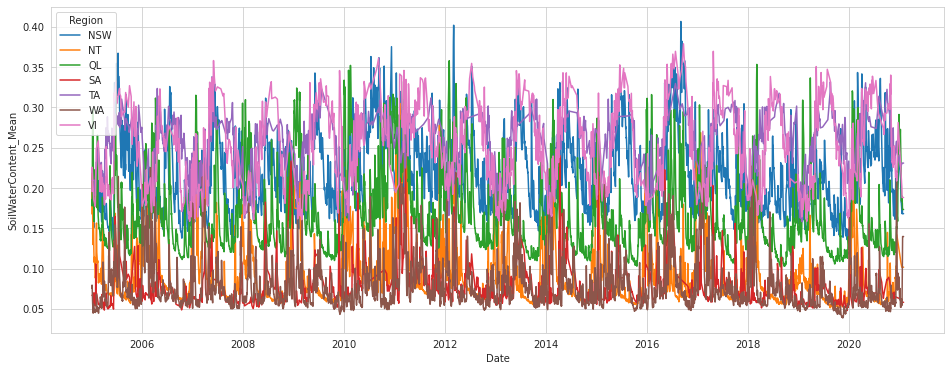

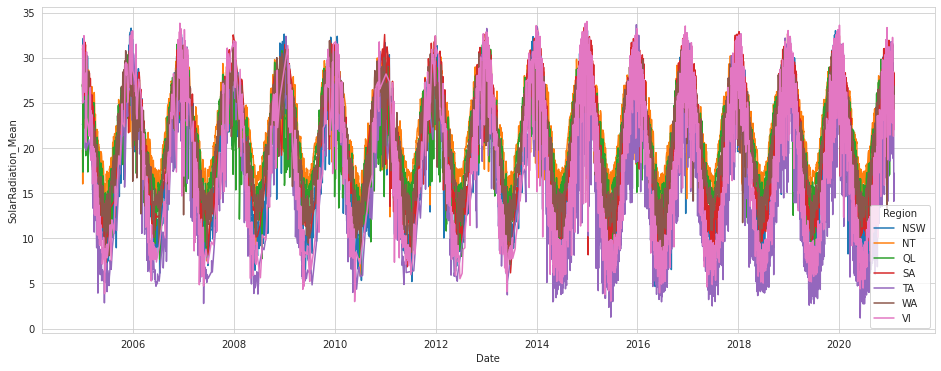

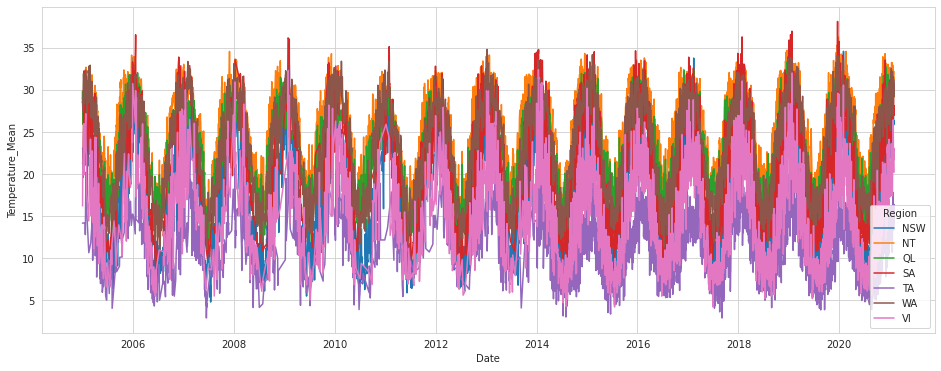

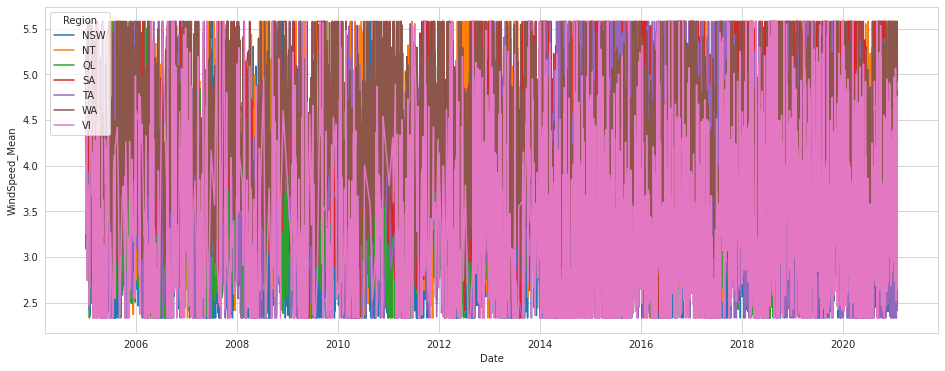

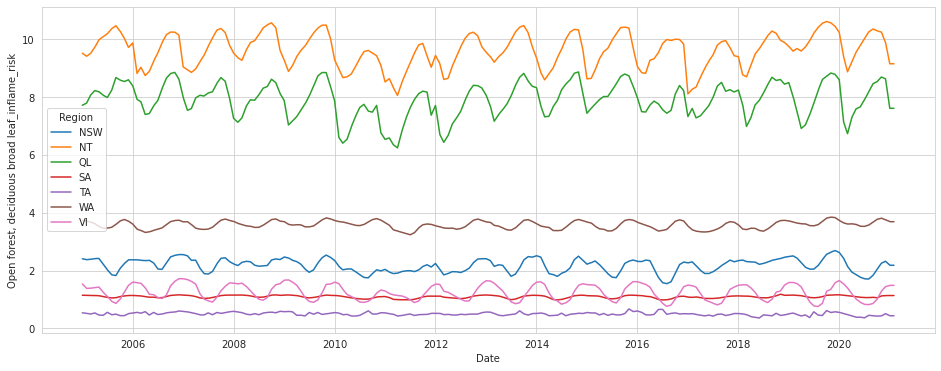

In [ ]:
list_plts = ["Estimated_fire_area", "Precipitation_Mean", "RelativeHumidity_Mean", "SoilWaterContent_Mean", "SolarRadiation_Mean", 
             "Temperature_Mean", "WindSpeed_Mean", "Open forest, deciduous broad leaf_inflame_risk"]
for plot in list_plts:
    plt.figure(figsize=(16, 6))
    g = sns.lineplot(x="Date", y=plot, hue='Region', data=aggr_df)

[Text(0, 0.5, 'Mean Temperature in °C')]

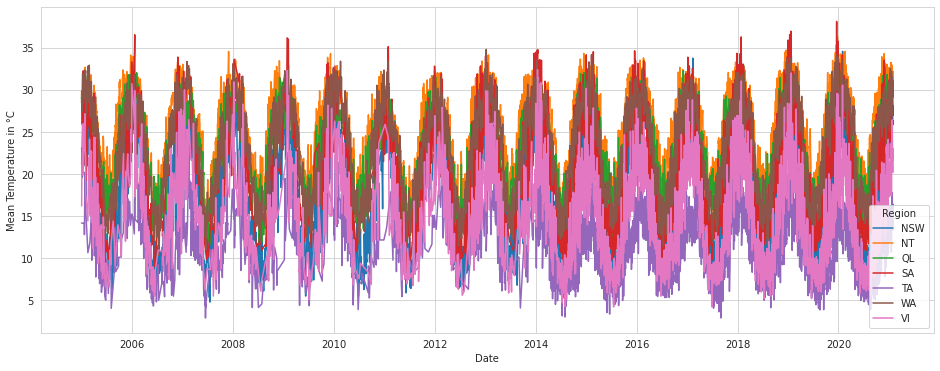

In [16]:
plt.figure(figsize=(16, 6))
g = sns.lineplot(x="Date", y="Temperature_Mean", hue='Region', data=aggr_df)
g.set(ylabel = "Mean Temperature in °C")

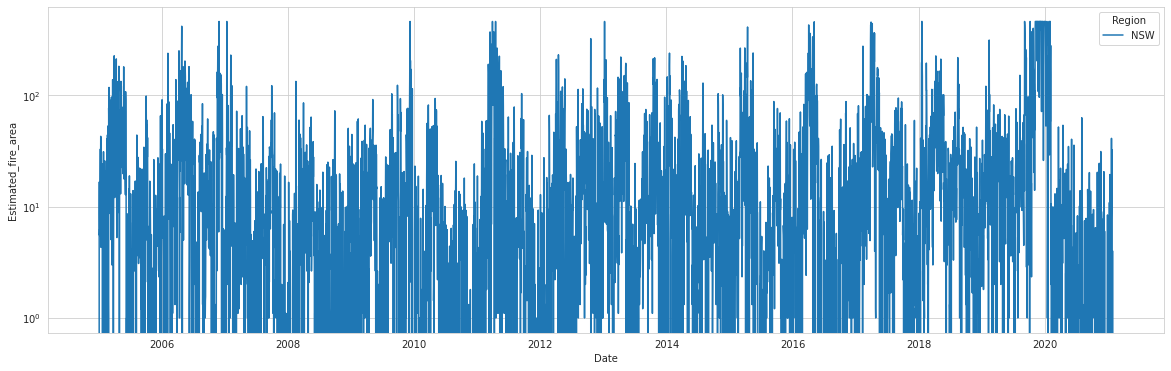

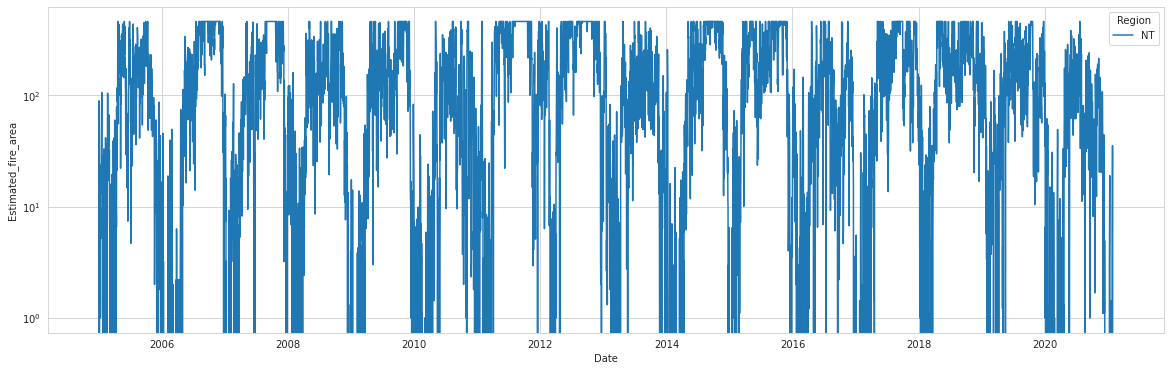

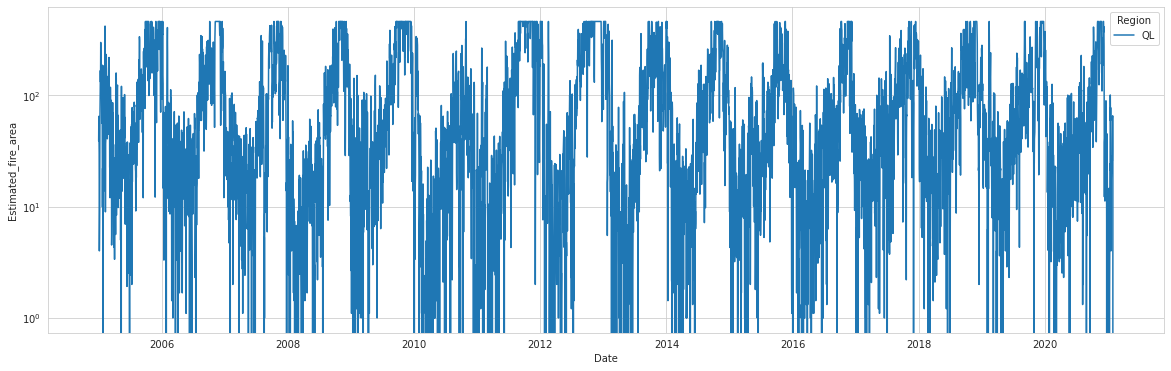

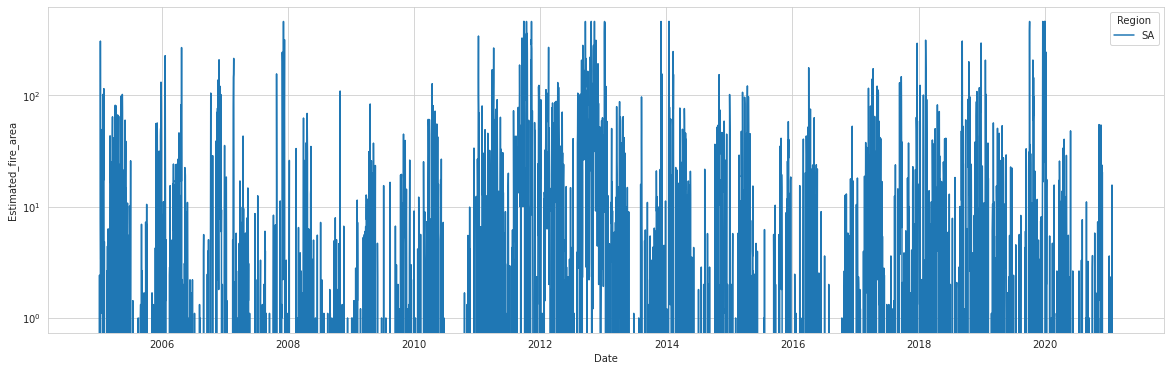

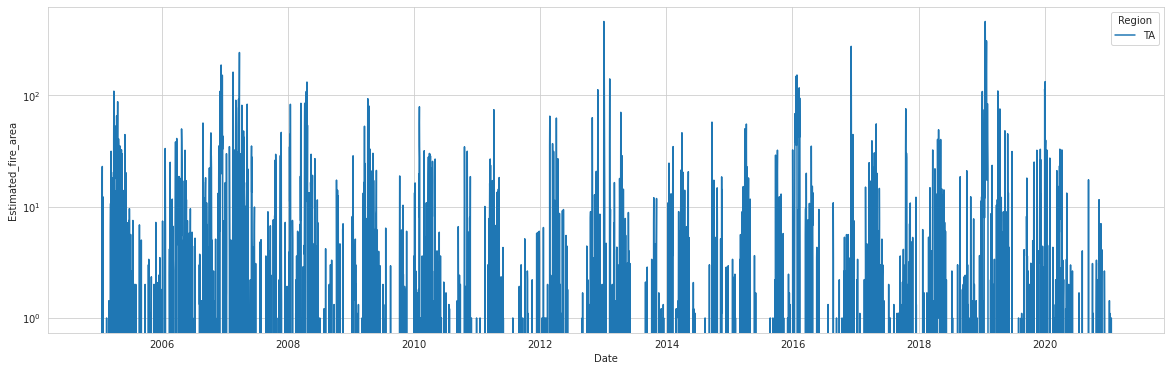

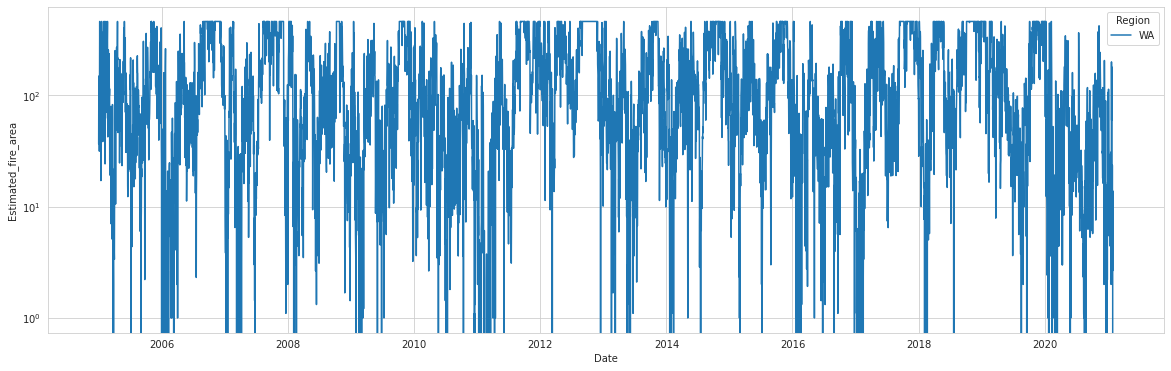

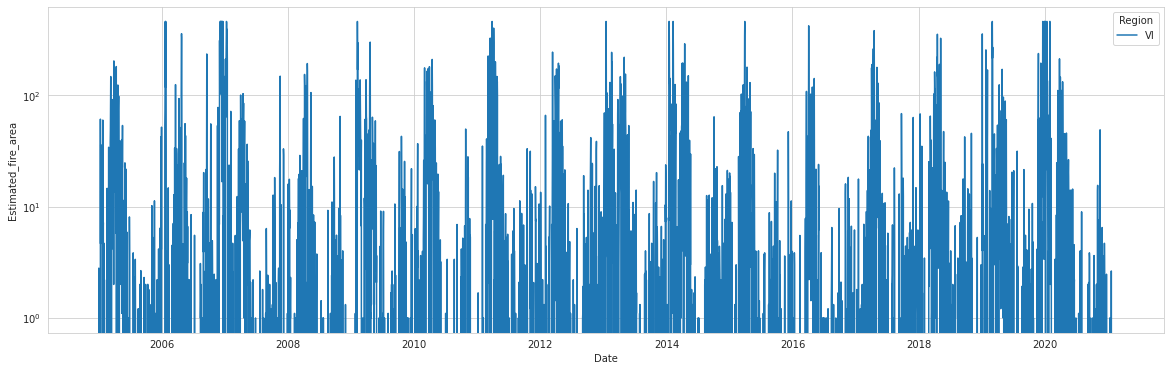

In [ ]:
for region in landclass_df.Region:
    plt.figure(figsize=(20, 6))
    g = sns.lineplot(x="Date", y="Estimated_fire_area",hue='Region',
                     data=aggr_df[aggr_df['Region']== region])
    g.set_yscale("log")

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log10

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:305: U

<Figure size 864x864 with 0 Axes>

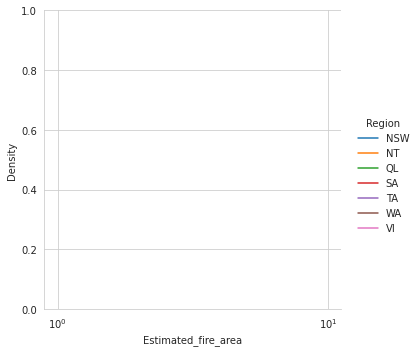

<Figure size 864x864 with 0 Axes>

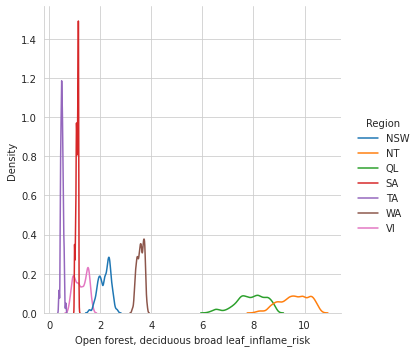

In [ ]:
plt.figure(figsize=(12, 12))
g = sns.displot(data=aggr_df, x="Estimated_fire_area", hue="Region", kind="kde", log_scale=True);

plt.figure(figsize=(12, 12));2
sns.set_style("whitegrid")
g = sns.displot(data=aggr_df, x="Open forest, deciduous broad leaf_inflame_risk", hue="Region", kind="kde");

No handles with labels found to put in legend.


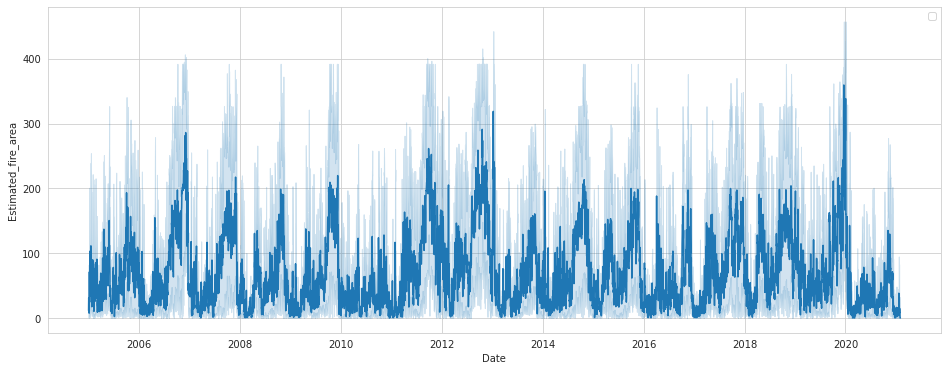

In [ ]:
#plt.figure(figsize=(16, 6))
#g = sns.lineplot(x="Date", y="Estimated_fire_area",hue='Region', data=aggr_df)
#plt.legend(loc='best')

plt.figure(figsize=(16, 6))
g = sns.lineplot(x="Date", y="Estimated_fire_area", data=aggr_df)
plt.legend(loc='best')

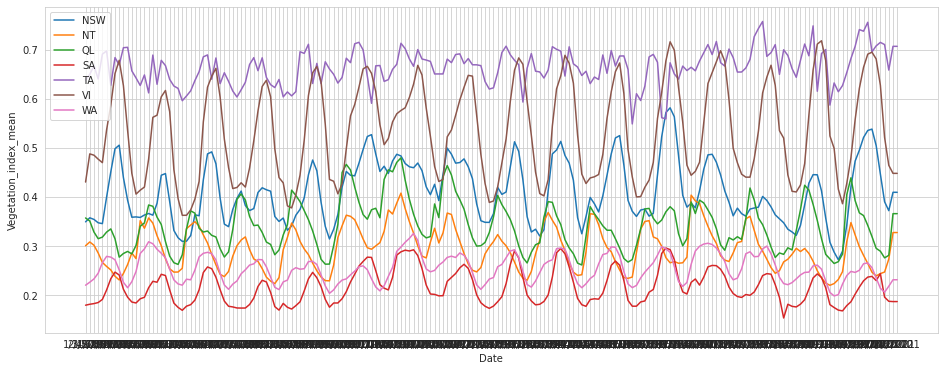

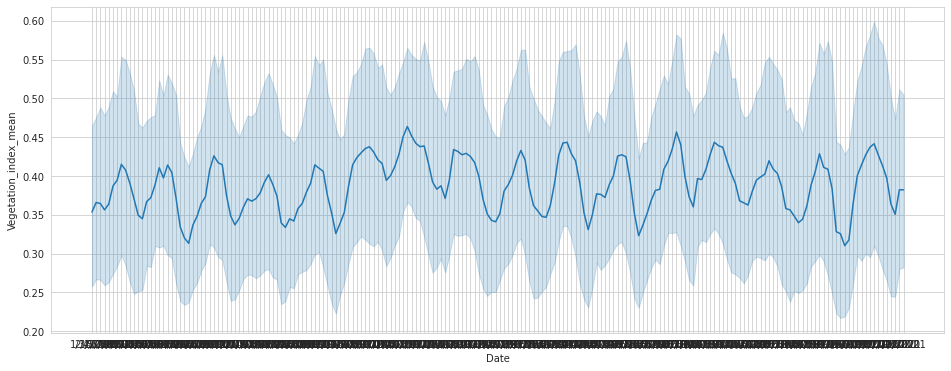

In [ ]:
##### Vegetation Data #####

plt.figure(figsize=(16, 6))
g = sns.lineplot(x="Date", y="Vegetation_index_mean",hue='Region', data=vegetation_df)
plt.legend(loc='best')

plt.figure(figsize=(16, 6))
g = sns.lineplot(x="Date", y="Vegetation_index_mean", data=vegetation_df)

In [ ]:
# Visual analysis for Estimated Fire Area

fig = px.line(aggr_df, x = "Date", y = "Estimated_fire_area", title = "Fire Area")
fig.update_xaxes(
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list([
            dict(count = 1, label = "1year", step = "year", stepmode = "backward"),
            dict(count = 2, label = "2year", step = "year", stepmode = "backward"),
            dict(count = 3, label = "3year", step = "year", stepmode = "backward"),
            dict(step = "all")
        ])
    
    )
)
fig.show()

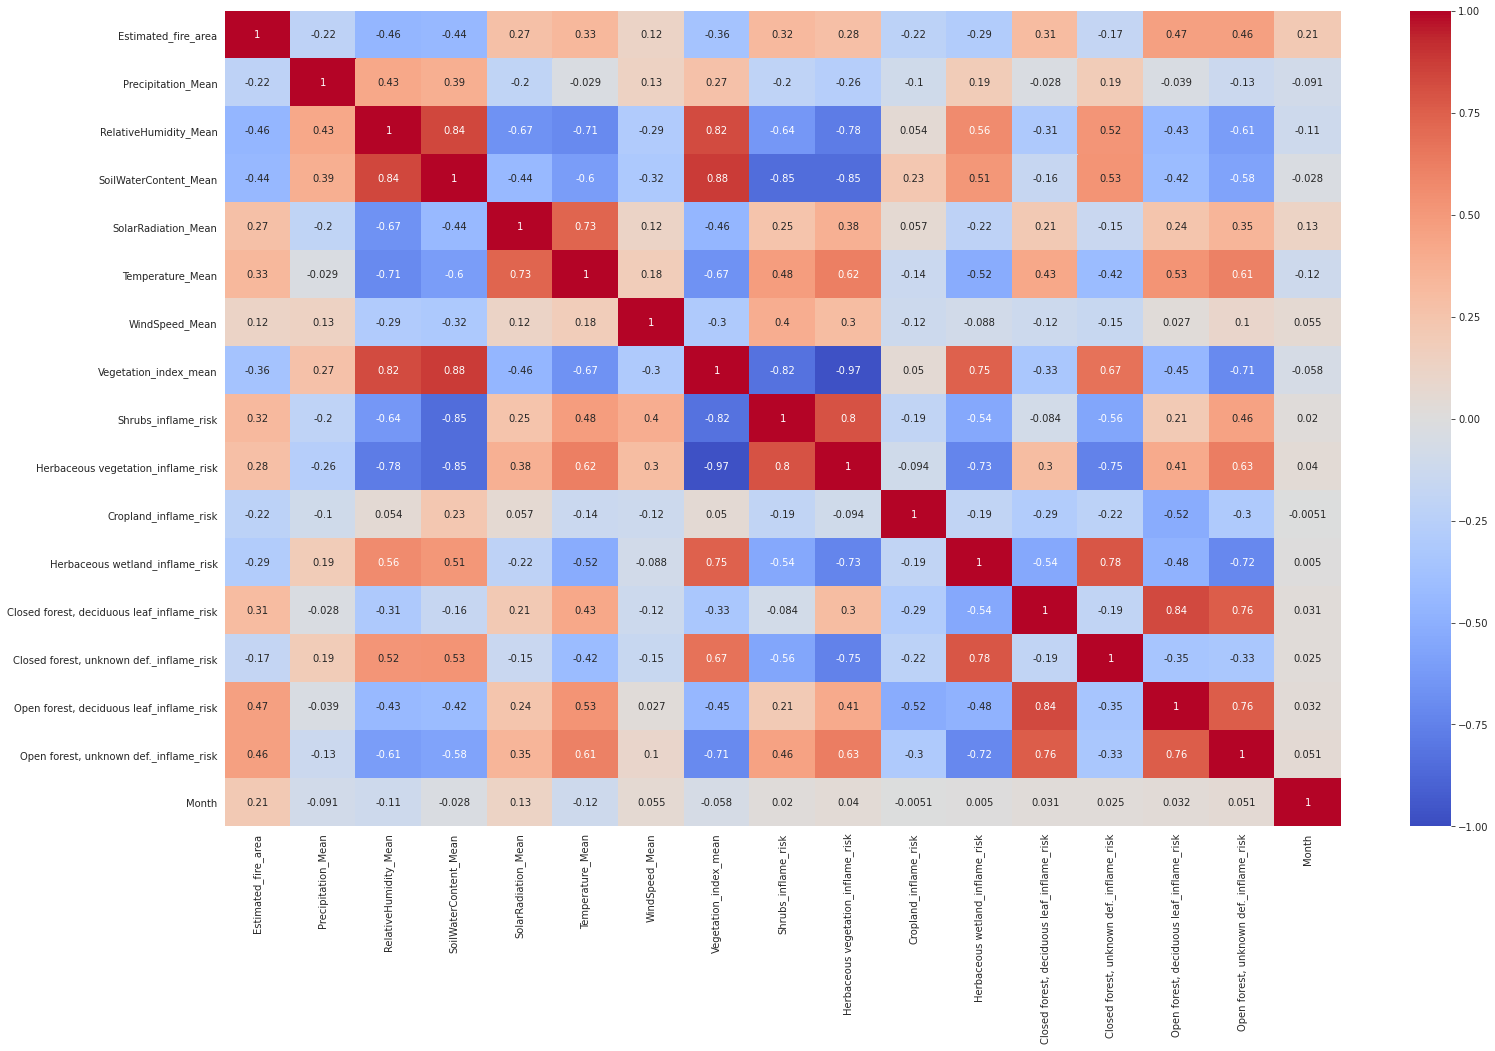

In [ ]:
##### Heat Map #####
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
corr_df = aggr_df.copy()

corr_df = aggr_df.rename(columns={'Cultivated and managed vegetation/agriculture (cropland)_inflame_risk': "Cropland_inflame_risk", 'Closed forest, unknown_inflame_risk':"Closed forest, unknown def._inflame_risk", 'Open forest, unknown definitions_inflame_risk': "Open forest, unknown def._inflame_risk", 'Closed forest, deciduous broad leaf_inflame_risk':'Closed forest, deciduous leaf_inflame_risk', 'Open forest, deciduous broad leaf_inflame_risk':'Open forest, deciduous leaf_inflame_risk'}, inplace = False)
corr_df = corr_df[['Estimated_fire_area','Precipitation_Mean','RelativeHumidity_Mean', 'SoilWaterContent_Mean', 'SolarRadiation_Mean', 'Temperature_Mean', 'WindSpeed_Mean','Vegetation_index_mean','Shrubs_inflame_risk','Herbaceous vegetation_inflame_risk','Cropland_inflame_risk','Herbaceous wetland_inflame_risk', 'Closed forest, deciduous leaf_inflame_risk', 'Closed forest, unknown def._inflame_risk', 'Open forest, deciduous leaf_inflame_risk', 'Open forest, unknown def._inflame_risk','Month']]

plt.figure(figsize = (25, 15))
sns.heatmap(corr_df.corr(), center = 0, cmap = "coolwarm", annot= True, vmin = -1, vmax = 1);